## Explorating the Tree of Life

<table><tr><td>
<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391" width=200><a href="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391">source</a></td><td><img src="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png" width=300><a href="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png">source</a></td></tr></table>

In this hands-on exercise, you answer the following questions by using pandas data structures and methods to analyze the eukaryote genome data store in the following tab-delimited file. https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv

In [2]:
import pandas as pd
%matplotlib inline

# this input file is tab-delimited instead of comma-delimited
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# Load the csv file into a dataframe
euk = pd.read_csv(tsvFile, sep="\t")
euk

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome


## Q1. How many Mammals have at least 20,000 genes? What are their scientific names?
*Note:*
- *Mammals are under Class*
- *Scientific names are under Species*


In [3]:
# Your code here . . .
euk[(euk.Class == 'Mammals') &
    (euk['Number of genes'] > '20,000')]

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
44,Homo sapiens,Animals,Mammals,3257.3200,41.465,60679,119294,2002,Chromosome
45,Mus musculus,Animals,Mammals,2818.9700,41.951,48701,78443,2004,Chromosome
65,Rattus norvegicus,Animals,Mammals,2870.1800,42.3282,39365,56113,2002,Chromosome
70,Felis catus,Animals,Mammals,2521.8600,41.8806,35234,54726,2006,Chromosome
74,Bos taurus,Animals,Mammals,2715.8500,41.9362,34966,63696,2017,Chromosome
...,...,...,...,...,...,...,...,...,...
5087,Macaca mulatta,Animals,Mammals,2969.9700,41.8692,21524,17802,2011,Chromosome
5152,Macaca fascicularis,Animals,Mammals,3126.5600,42.0609,21132,17456,2011,Chromosome
5180,Cricetulus griseus,Animals,Mammals,2368.9100,41.5,32567,46750,2018,Scaffold
5738,Pan troglodytes,Animals,Mammals,32.7991,41,21,20,2004,Chromosome


### Q2. Animals are a part of Kingdom. How many records are there for each Class of Animals?

In [4]:
# Your code here . . .
euk[(euk["Kingdom"] == "Animals")].Class.value_counts()

,count
Class,
Mammals,658
Insects,602
Fishes,282
Other Animals,210
Birds,172
Roundworms,162
Flatworms,47
Reptiles,41
Amphibians,7


### Q3. Animals are a part of Kingdom. How many unique Species are there for each Class of Animals?

In [5]:
# Your code here . . .
for i in ["Mammals", "Insects", "Fishes", "Other Animals", "Birds", "Roundworms", "Flatworms", "Reptiles", "Amphibians"]:
  print(i, euk[(euk.Kingdom == 'Animals') & (euk.Class == i)].Species.nunique())


Mammals 313
Insects 402
Fishes 218
Other Animals 171
Birds 144
Roundworms 116
Flatworms 34
Reptiles 38
Amphibians 6


### Q4. What are the unique scientific names of Mammals with the genus name Macaca?
*Recall: the scientific name starts with genus followed by a space and then the species name. Example: Homo sapiens, where Homo is the genus name and sapiens is the species name.*

In [6]:
# Your code here . . .
euk[(euk.Class == 'Mammals') & (euk.Species.str.split(' ').str[0] == "Macaca")].Species.value_counts()


,count
Species,
Macaca mulatta,7
Macaca fascicularis,3
Macaca nemestrina,1
Macaca fuscata fuscata,1


### Q5. Modify the Species names to only contain the scientific names  and create a new dataframe.

Some of the names in the Species column have more than two parts, such as `Emiliania huxleyi CCMP1516`. Create a new column `Species` that contains only the first two parts of name, such as `Emiliania huxleyi`. Combine this new Species column with `Kingdom`, `Class`, `Size (Mb)`, `Number of genes`, and `Number of proteins` and store this new dataframe as `df_species`.

Hint: Follow Q3 in Lecture 4 with a little twist. Instead of just getting the first element from the split results, you will get the first two elements using `.str[0:2]` which will give you a list. You can then use `.str.join(" ")` to change it back to a string.

In [7]:
# Your code here . . .
euk.Species.str.split().str[0:2].str.join(" ")

neweuk = euk[["Species", "Kingdom", "Class", "Size (Mb)", "Number of genes", "Number of proteins"]]
neweuk

,Species,Kingdom,Class,Size (Mb),Number of genes,Number of proteins
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,38549,38554
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,38311,48265
2,Glycine max,Plants,Land Plants,979.046000,59847,71219
3,Medicago truncatula,Plants,Land Plants,412.924000,37603,41939
4,Solanum lycopersicum,Plants,Land Plants,828.349000,31200,37660
...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,-,-
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,155,298
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,-,-
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,-,-


### Q6. Create a pie plot using pandas to show the number of unique Species in each Class of Animals using the new dataframe you created in Q5
Hint: First, create a new dataframe that contains the number of unique Species and the index is the corresponding Animals Class. Then, use that dataframe to plot the pie plot.
[Check out this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

In [8]:
# Create a new dataframe that contains the number of unique Species and
# the index is the corresponding Animals Class.

# Your code here . . .
for i in ["Mammals", "Insects", "Fishes", "Other Animals", "Birds", "Roundworms", "Flatworms", "Reptiles", "Amphibians"]:
  print(i, neweuk[(neweuk.Kingdom == 'Animals') & (neweuk.Class == i)].Species.nunique())

df = df = pd.DataFrame({'Number of Unique Species': [313, 402, 218, 171, 144, 116, 34, 38, 6]},
                  index=['Mammals', 'Insects', 'Fishes', 'Other Animals', 'Birds', 'Roundworms', 'Flatworms', 'Reptiles', 'Amphibians'])
df


Mammals 313
Insects 402
Fishes 218
Other Animals 171
Birds 144
Roundworms 116
Flatworms 34
Reptiles 38
Amphibians 6


,Number of Unique Species
Mammals,313
Insects,402
Fishes,218
Other Animals,171
Birds,144
Roundworms,116
Flatworms,34
Reptiles,38
Amphibians,6


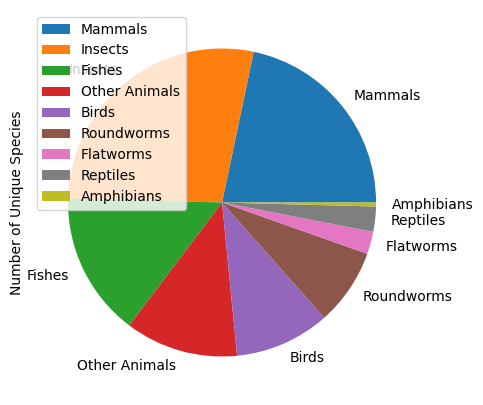

In [9]:
# Create a panda pie plot using the dataframe above
plot = df.plot.pie(y='Number of Unique Species', figsize=(5, 5))

# Your code here . . .